# <center>Рекомендательные системы
Методы построения рекомендательных систем можно представить следующим образом:

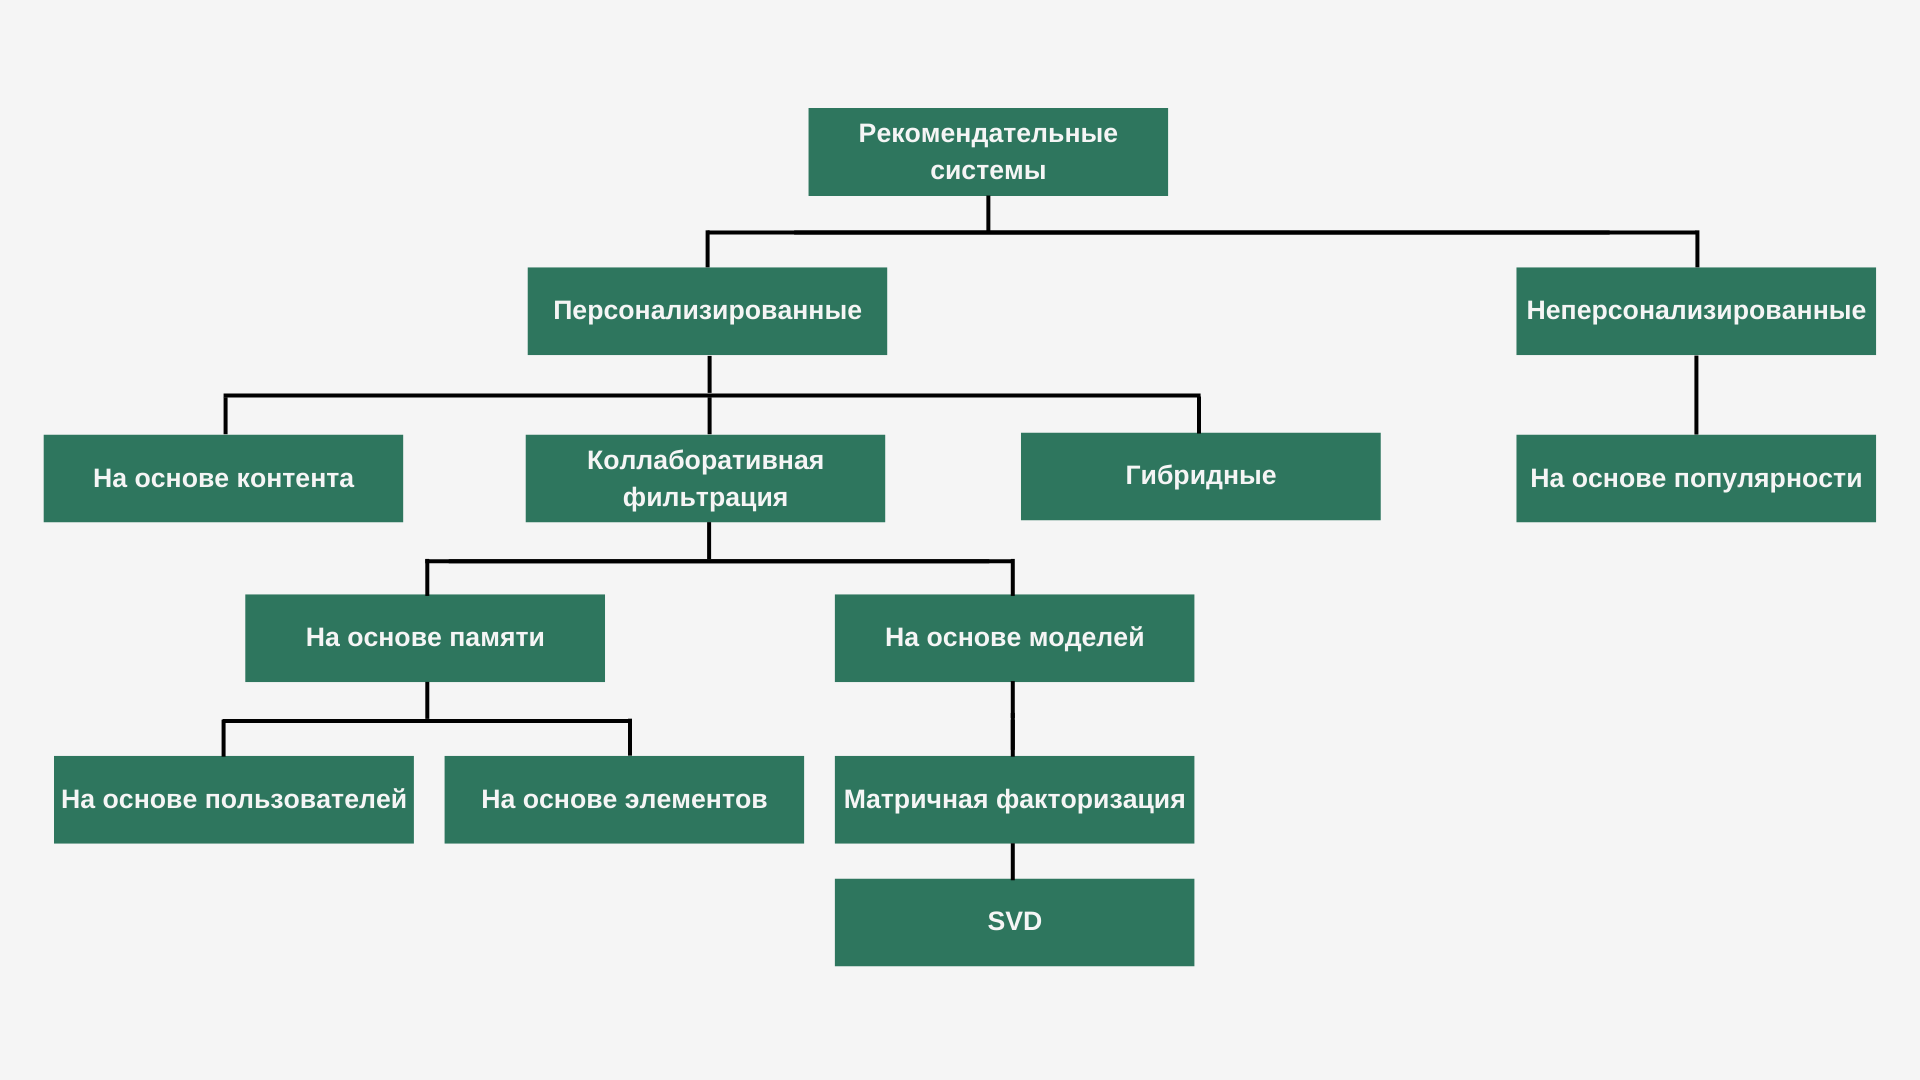

# <center>Данные для рекомендательной системы
Существует два способа сбора данных для рекомендательных систем — **явный** (англ. *explicit feedback, explicit ratings*) и **неявный** (англ. *implicit feedback, implicit ratings*). Далее мы рассмотрим оба подхода и связанные с ними проблемы.

# <center>Явный сбор данных (Explicit feedback)
В рамках явного сбора данных получают ту информацию, которую передают сами пользователи, например это оценки фильмов на *Netflix* или товаров на *Amazon*. Явные отзывы учитывают мнение пользователя о том, насколько ему понравился или не понравился продукт. Данные явных отзывов легко поддаются количественной оценке.

Однако использование таких данных сопряжено с рядом **проблем**:
* После сбора явных отзывов вы с большой вероятностью получите набор оценок **с ярко выраженной полярностью**.

    Когда вы последний раз оставляли отзыв на какой-то товар или фильм? Очень часто люди ставят оценку только в случае, если что-либо вызвало у них очень сильные эмоции, преимущественно негативные.

* Явные отзывы **не учитывают контекст**, в котором был оценён тот или иной продукт.

    Допустим, вам срочно нужно подтянуть уровень английского, чтобы пройти собеседование. Вы находите отличный самоучитель и ставите ему наивысшую оценку. Однако это вовсе не значит, что теперь для вас релевантны рекомендации учебников по иностранным языкам.

* Также есть **сложности с выстраиванием системы оценок**: необходимо придумать такую шкалу, чтобы пользователям было легко выражать своё мнение и это действие не вызывало у них раздражение.

Обычно данные с явной обратной связью выглядят следующим образом:  
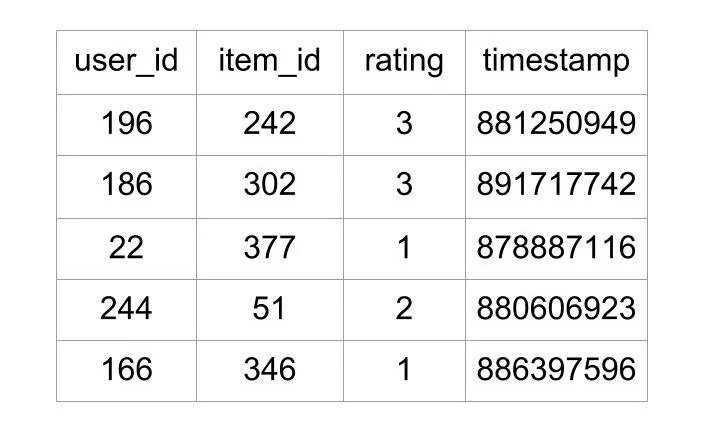

Здесь есть некоторый *id* пользователя (*user_id*), *id* оцениваемого этим пользователем продукта (*item_id*), выставленный рейтинг (*rating*) и некоторая дополнительная информация, например временная отсечка (*timestamp*).

В качестве *timestamp* здесь фиксируется часто используемый показатель, отражающий количество секунд, прошедших с 1 января 1970 года.

# <center>Неявный сбор данных (Implicit feedback)
Неявная обратная связь не отражает непосредственный интерес пользователя, но действует как косвенный показатель этого интереса.

Примерами неявных данных являются история просмотров, клики по ссылкам, подсчёт количества проигрываний песни, процент прокрутки веб-страницы или даже движение курсора по странице. Такие данные собирают практически все интернет-сервисы. Любая социальная сеть (ВК, TikTok и т. д.) регистрируют все возможные действия пользователя.

Объёмы данных неявной обратной связи огромны, и их легко собирать, ведь они не требуют дополнительных действий от пользователя — как только вы получаете разрешение пользователя на сбор его данных, вы можете спокойно использовать информацию о его действиях.

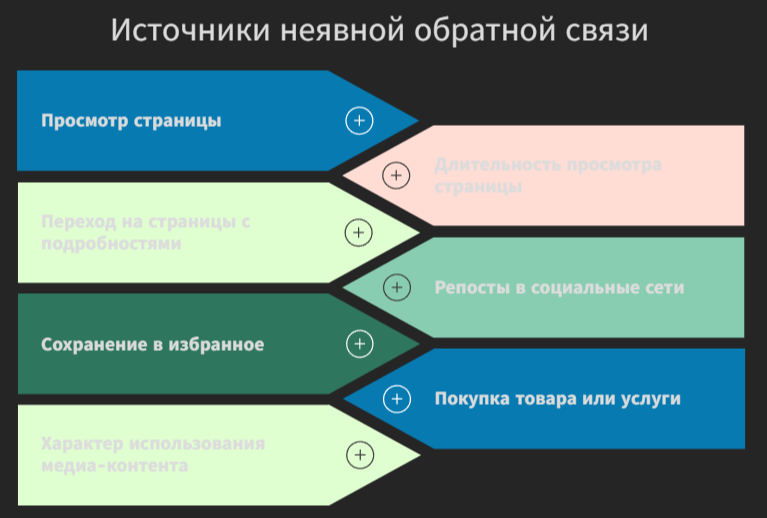

Также стоит упомянуть о некоторых особенностях неявных данных:

* **Отсутствие прямого измерения негативных предпочтений.**

    В отличие от явных отзывов, когда пользователь ставит плохую оценку, у нас нет прямого способа измерить негативное отношение пользователя к продукту. Если пользователь много раз слушает одну и ту же песню, мы можем сделать вывод, что она ему нравится, и посоветовать похожую. Однако если какую-то песню он вообще не слушает, это не значит, что он негативно к ней относится — возможно, он даже не знает о её существовании. Таким образом, через неявные реакции мы можем точно оценивать лишь положительное отношение.

* **Возможность делать верные выводы по численному выражению обратной связи.**

    Если выразить неявную обратную связь в численном эквиваленте, мы сможем однозначно определять, насколько какой-то товар или контент привлекают пользователя. К примеру, если человек слушает Бетховена намного больше, чем песни группы Rammstein, то мы можем сделать вывод, что произведения Бетховена привлекают его больше.

* **Большой объём зашумлённых данных.**

    Прежде чем использовать данные неявной обратной связи для построения рекомендательной системы, придётся потратить много времени на их предобработку.



# <center>Метрики в рекомендательных системах
## <center>Офлайн-метрики
Существует несколько категорий офлайн-метрик:

* **Prediction Accuracy** — оценка точности предсказываемого рейтинга.
* **Decision Support** — оценка релевантности рекомендаций.
* **Rank Accuracy** — оценка качества рекомендаций с учётом ранжирования.

### **Prediction accuracy**
Метрики *Prediction Accuracy* сравнивают прогнозируемые значения рейтинга с реальными оценками пользователей. Для того чтобы количественно оценить схожесть фактических и предсказанных данных, обычно используются уже знакомые вам метрики *MAE*, *MSE* и *RMSE*.

### **Decision support**
По результатам построения рекомендательной системы мы можем создать матрицу ошибок, которая будет выглядеть следующим образом:

||RELEVANT|NOT RELEVANT|
|-|-|-|
|Recommended|True Positive (TP)|False Positive (FP)|
|Not recommended|False Negative (FN)|True Negative (TN)|

и рассчитать интересующие нас метрики:
$ \text{Precision}: P, \space \text{Recall}: R $

Однако при вычислении этих метрик мы совершенно не учитываем ранжирование рекомендаций, хотя должно иметь значение, определены правильно самые первые рекомендации (например, те фильмы, которые понравятся пользователю в первую очередь и заслужат у него наивысшие оценки) или лишь последние. Чтобы преодолеть эту проблему, эти метрики используются с отсечением $k$ рекомендаций.

*Precision* и *recall* в точке отсечения $k$, $P@k$ и $R@k$ — это просто *precision* и *recall*, рассчитанные с учётом только подмножества рекомендаций от ранга $1$ до $k$.

К примеру, ниже представлены расчёты для $P@3$ (*precision* c отсечением $3$) и $P@5$ (*precision* с отсечением $5$):

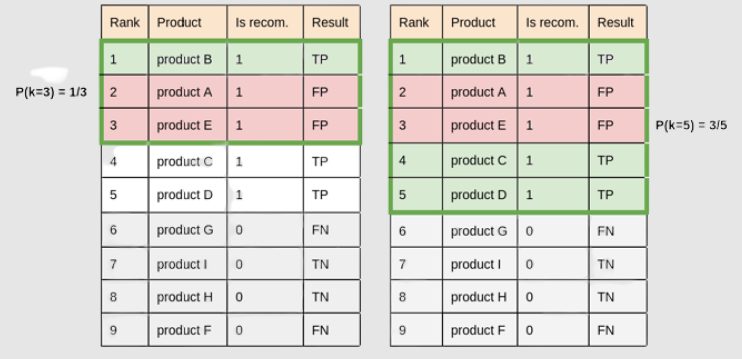

В таблице слева мы отсекаем до $k=3$, поэтому берём только первые три рекомендации. Среди них рекомендованы все три продукта (значение $1$ в столбце “Is recom.”). Мы видим, что лишь одна рекомендация сделана корректно (значение TP в столбце “Result”). Поэтому показатель $P@3=\frac{1}{3}$.

В примере справа мы отсекаем до $k=5$, поэтому отбираем первые пять рекомендаций. Из них все пять рекомендованы пользователю и три сделаны верно. Поэтому показатель $P@5=\frac{3}{5}$.

Теперь рассмотрим вычисление метрики *recall* с отсечением.

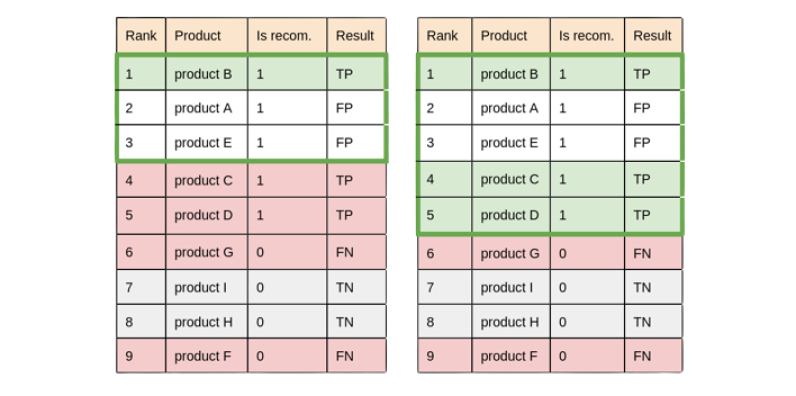

В данной таблице зелёным выделены релевантные рекомендации, белым — нерелевантные.

Среди трёх рекомендаций в таблице слева есть лишь один релевантный продукт, и он подобран верно. Поэтому $R@3=1$.

Среди пяти рекомендаций в таблице справа есть три релевантных объекта, и все они верно определены. Так что получаем также $R@5=1$.

### **Rank accuracy**
Рекомендательные системы должны быть способны помещать наиболее релевантные элементы на высокие позиции в списке рекомендаций. Первый рекомендуемый элемент всегда самый важный, следующий — второй по важности и т. д.

Сейчас мы рассмотрим метрики, которые как раз учитывают положение продукта в рейтинге:

* *MRR (Mean Reciprocal Rank)*;
* *MAP (Mean Average Precision)*;
* *NDCG (Normalized Discounted Cumulative Gain)*.
#### **MRR (средний реципрокный ранг)**
Это самая простая метрика из трёх перечисленных. Она определяет, где среди рекомендованных находится первый релевантный элемент.

В общем виде формулу для этой метрики можно записать следующим образом:
$$ \text{MRR}=\frac{1}{|Q|}\sum^{|Q|}_{i=1}\frac{1}{\text{rank}_i} $$
Здесь:

* $|Q|$ — общее количество запросов;
* $\text{rank}_i$ — позиция первого релевантного элемента для $i$-го запроса.

Ниже представлен пример вычисления *MRR*. Для каждого пользователя мы находим первый релевантный элемент и вычисляем, сколько элементов к этому моменту уже было предложено пользователю. Далее делим $1$ на это количество. После этого находим среднее арифметическое для всех полученных долей.

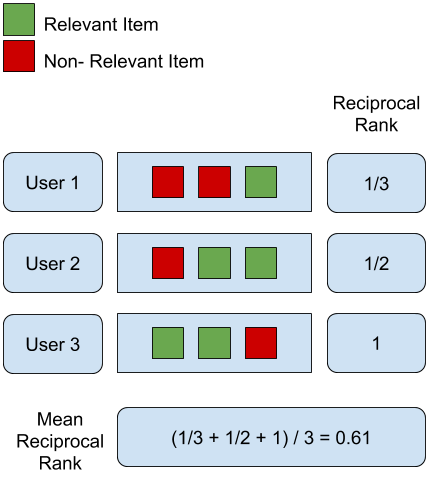

|Преимущества|Недостатки|
|-|-|
|Метод прост в вычислениях и легко интерпретируется.|Метрика фокусируется на одном элементе из списка и не оценивает остальные рекомендуемые элементы.|
|Метод уделяет большее внимание первому релевантному элементу списка, что в целом отражает логику рекомендательных систем.|Список с одним релевантным элементом имеет такой же вес в вычислении итогового показателя, как и список с большим количеством релевантных элементов. Это не всегда хорошо.|
||Метрика плохо подходит для случаев, когда важно получить именно ряд рекомендаций, а не одну рекомендацию.|

Для вычисления *MRR* в *Python* рекомендуем использовать функцию `mean_reciprocal_rank()` из библиотеки [cute_ranking](https://github.com/ncoop57/cute_ranking).

#### **MAP (средняя точность)**
Допустим, у нас есть набор данных и мы хотим оценить весь список рекомендуемых элементов до определённого отсечения $N$, как мы делали, к примеру, с $P@N$. Метрика $P@N$ вычисляет долю рекомендаций, которые являются хорошими. Её недостатком является то, что она рассматривает весь список как набор элементов и одинаково относится ко всем ошибкам в рекомендуемом списке (т. е. неважно, ошиблись мы в первой рекомендации или в десятой). Нам же важно придать больший вес ошибкам в верхней части списка, а затем постепенно уменьшать их значимость по мере продвижения вниз по списку.

Метрика MAP помогает достичь этой цели:

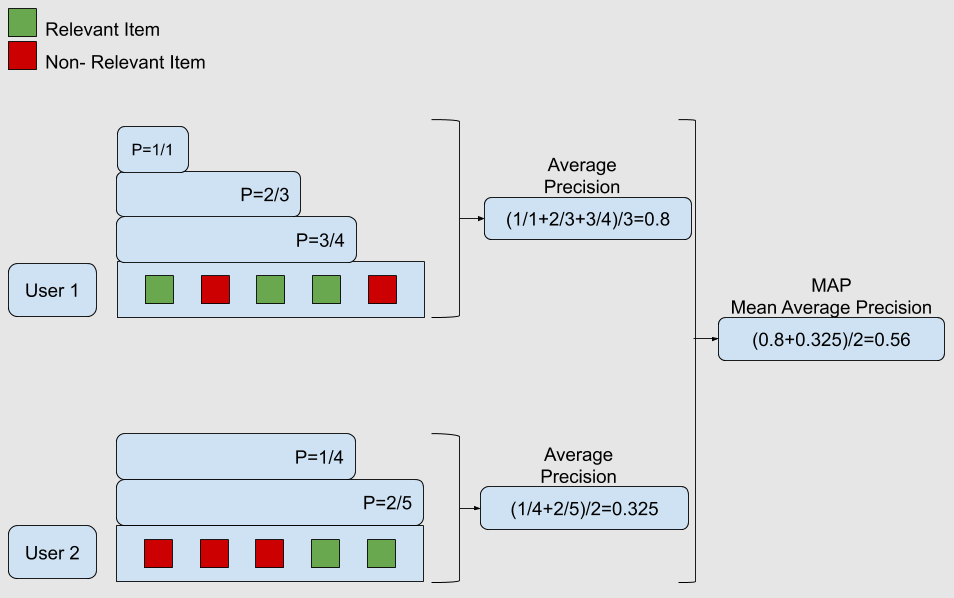

Для каждого пользователя мы вычисляем долю релевантных рекомендаций для всех возможных отсечений по релевантным элементам и далее усредняем для каждого пользователя получившиеся доли. Для итогового результата усредняем показатели по всем пользователям.

|Преимущества|Недостататки|
|-|-|
|Метрика естественным образом обрабатывает ранжирование списков рекомендованных элементов.|Метрика отлично подходит для бинарных (релевантных/нерелевантных) оценок, однако не подходит для рейтинговых числовых оценок.|
|Метрика способна придавать вес ошибкам пропорционально их месту в списке: больший вес — ошибкам в верхней части, меньший вес — ошибкам ниже по списку. Это соответствует необходимости показать как можно больше релевантных элементов в верхней части списка рекомендаций.||

#### **NDCG (нормализованный дисконтированный кумулятивный выигрыш)**
Подход к вычислению этой метрики схож с подходом к вычислению *MAP*: в обоих случаях высоко ценится выдача релевантных продуктов на первых позициях. Однако метрика *NDCG* позволяет использовать информацию о том, что разные продукты имеют разную степень релевантности, то есть учитывает их рейтинг.

Представим, что поисковая система выдаёт пять статей с именами *D1, D2, D3, D4, D5*, которые выводятся в таком же порядке. Определим шкалу релевантности (0–3), где:
* 0 — не релевантно;
* 1–2 — в некоторой степени релевантно;
* 3 — полностью релевантно.

Предположим, статьи имеют следующие оценки релевантности:
* D1 — 3;
* D2 — 2;
* D3 — 0;
* D4 — 0;
* D5 — 1.

Кумулятивный выигрыш представляет собой сумму этих оценок релевантности и может быть рассчитан как:
$$ CG = \sum^5_{i=1} (rel)_i = 3 + 2 + 0 + 0 + 1 = 6 $$
Здесь $rel$ — оценка релевантности документа.
Дисконтированный кумулятивный выигрыш можно рассчитать по формуле:
$$ DCG = \sum^5_{i=1} \frac{(rel)_i}{\log_2(i+1)} $$
Таким образом, дисконтированный кумулятивный выигрыш в приведённом выше примере составляет:
$$ DCG_5 = \frac{3}{\log_2(2)} + \frac{2}{\log_2(3)} + \frac{0}{\log_2(4)} + \frac{0}{\log_2(5)} + \frac{1}{\log_2(6)} \approx 4.67 $$
Теперь нам нужно расположить статьи в порядке убывания рейтинга и рассчитать DCG, чтобы получить рейтинг идеального дисконтированного кумулятивного выигрыша (IDCG):
$$ IDCG_5 = \frac{3}{\log_2(2)} + \frac{2}{\log_2(3)} + \frac{1}{\log_2(4)} + \frac{0}{\log_2(5)} + \frac{0}{\log_2(6)} \approx 4.76 $$
Рассчитаем нормализованный DCG по следующей формуле:
$$ nDCG = \frac{DCG_5}{IDCG_5} = \frac{4.67}{4.76} \approx 0.98 $$
Можно получить то же значение, если воспользоваться готовой функцией из модуля `sklearn`:
```py
from sklearn.metrics import ndcg_score, dcg_score
import numpy as np

y_true = np.asarray([[3, 2, 1, 0, 0]])
relevance = np.asarray([[3, 2, 0, 0, 1]])

print(ndcg_score(y_true, relevance))

#0.980840401274087

```


In [5]:
from sklearn.metrics import ndcg_score
import numpy as np
y_true = np.array([[2, 4, 1, 1, 1]])
y_pred = np.array([[2, 5, 2, 3, 1]])
ndcg_score(y_true, y_pred)

0.9748317848747132

# <center>Онлайн-метрики
Выделяют пять групп бизнес-показателей, на которые рекомендательные системы оказывают самое существенное влияние:

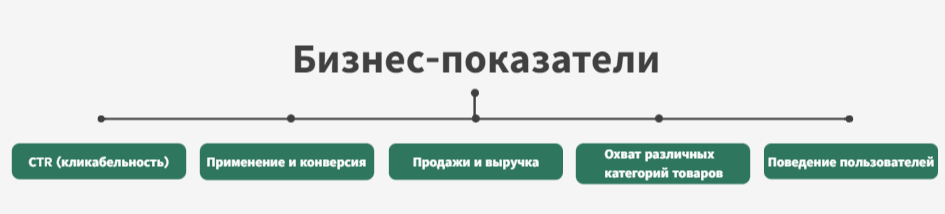

# <center>Проблема холодного старта и popularity-based model
Рекомендательные системы строятся на данных о товарах и о пользователях. Но что делать, если какой-то информации не хватает или если данных вообще нет?

В таком случае говорят о **проблеме холодного старта**. Требуется потратить немного времени или сделать несколько шагов, чтобы «разогреть» сервис рекомендаций, прежде чем он начнёт выдавать релевантные результаты с достаточной эффективностью.

Можно выделить два вида проблем холодного старта:
* проблема холодного старта пользователя;
* проблема холодного старта продукта.
## Холодный старт пользователя
Когда система сталкивается с новыми посетителями веб-сайта, не имеющими истории просмотров или известных предпочтений, создание персонализированного опыта для них становится сложной задачей, поскольку данные, обычно используемые для создания рекомендаций, отсутствуют.

Рекомендательные системы не могут дать корректную рекомендацию не только для тех, кто впервые заходит на сайт. Пользовательский «холодный старт» может возникнуть даже у постоянных посетителей, если их поведение и предпочтения меняются от одной сессии к другой. 
## Холодный старт продукта
Когда новый товар добавляется в интернет-магазин или когда свежий контент загружается на медиаплатформу, первое время о нём никто не знает. С нулевым количеством взаимодействий или оценок он практически невидим для рекомендательной системы независимо от того, насколько релевантным он будет для пользователей.
## Popularity-based model
Если к нам приходит клиент, про которого мы ничего не знаем, мы можем создать для него рекомендации с использованием *popularity-based*-модели. Это тип РС, которая формирует рекомендации на основе популярности продуктов. Например, если большинство людей часто покупает определённый продукт, то система знает, что он наиболее востребован среди аудитории, поэтому каждому новому пользователю, который только что зарегистрировался, система будет рекомендовать этот продукт.

|Преимущества|Недостатки|
|-|-|
|Не страдает от проблем холодного старта.|Не персонализирована (будет рекомендовать одинаковые продукты всем пользователям).|
|Нет необходимости в исторических данных для пользователя.||

